#Predictive Analytics Proyek Machine Learning Terapan


- **Nama:** Theodorus Andang Jatmiko
- **Email:** 225150201111050
- **ID Dicoding:** MC006D5Y1490

##Domain Proyek : Kesehatan (Healthcare)

Proyek Prediksi Diabetes ini bertujuan untuk mendeteksi penyakit diabetes sejak dini berdasarkan data klinis pasien. Dengan deteksi dini, penderita dapat mendapatkan perawatan lebih cepat, sehingga dapat mencegah komplikasi lebih parah dan meningkatkan kualitas hidup. Dalam prosesnya, saya menggunakan pendekatan klasifikasi dengan dua algoritma, yaitu Logistic Regression dan Random Forest, kemudian memilih model yang paling unggul untuk diterapkan.

Rumusan Masalah:

- Bagaimana cara mendeteksi penyakit diabetes lebih dini berdasarkan data klinis pasien menggunakan pendekatan machine learning?

##Business Understanding

###Problem Statements (Pernyataan Masalah):
Banyak penderita diabetes yang terlambat terdiagnosis sehingga terjadi komplikasi yang lebih parah. Deteksi dini diabetes penting untuk perawatan yang lebih tepat dan pencegahan masalah lebih luas.

###Goals (Tujuan):
Membangun sebuah model machine learning yang dapat melakukan prediksi penyakit diabetes berdasarkan data klinis pasien, sehingga dapat berguna untuk deteksi dini dan perawatan lebih dini.

###Solution Statement:
Saya akan menggunakan klasifikasi sebagai pendekatan penyelesaian masalah.
Saya akan menggunakan dua algoritma untuk mencari yang paling cocok:

- Logistic Regression
- Random Forest

Selain itu, saya juga akan melakukan hyperparameter tuning pada algoritma yang terpilih untuk mendapatkan performa yang lebih maksimal.

##Data Loading



Proses data loading merupakan tahap import dan load dataset.csv yang nantinya akan digunakan dalam komputasi. Dalam konteks analisis kepribadian, tahap ini memiliki peran kritis dalam mempersiapkan infrastruktur komputasi dan mengakses dataset yang akan diteliti.


###Import dan download library yang akan digunakan


In [42]:
!pip install --quiet gdown

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import gdown
%matplotlib inline
import seaborn as sns
import io

from scipy import stats
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

###Load dataset yang akan digunakan

In [44]:
from google.colab import files
uploaded = files.upload()

Saving diabetes.csv to diabetes (1).csv


###Menampilkan 5 data teratas di dataset

In [45]:
# Get the filename from the uploaded dictionary keys
file_name = list(uploaded.keys())[0]

# Read the CSV file content from the 'uploaded' dictionary
df_healthcare = pd.read_csv(io.StringIO(uploaded[file_name].decode('utf-8')))

# Display the first 5 rows of the DataFrame
df_healthcare.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


##Exploratory Data Analysis

Memahami karakteristik data, distribusi fitur, dan hubungan antar fitur serta dengan target.

###Memeriksa tipe data:

In [46]:
df_healthcare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


###Mengecek nilai yang hilang:

In [47]:
df_healthcare.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


###Identifikasi Duplikasi Data

In [48]:
duplicate_count = df_healthcare.duplicated().sum()
print(f"Jumlah data duplikat: {duplicate_count}")

Jumlah data duplikat: 0


###Melihat statistik deskriptif:

In [49]:
df_healthcare.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [50]:
# Cek ukuran data untuk memastikan baris sudah di-drop
df_healthcare.shape

(768, 9)

###Analisis distribusi masing-masing fitur

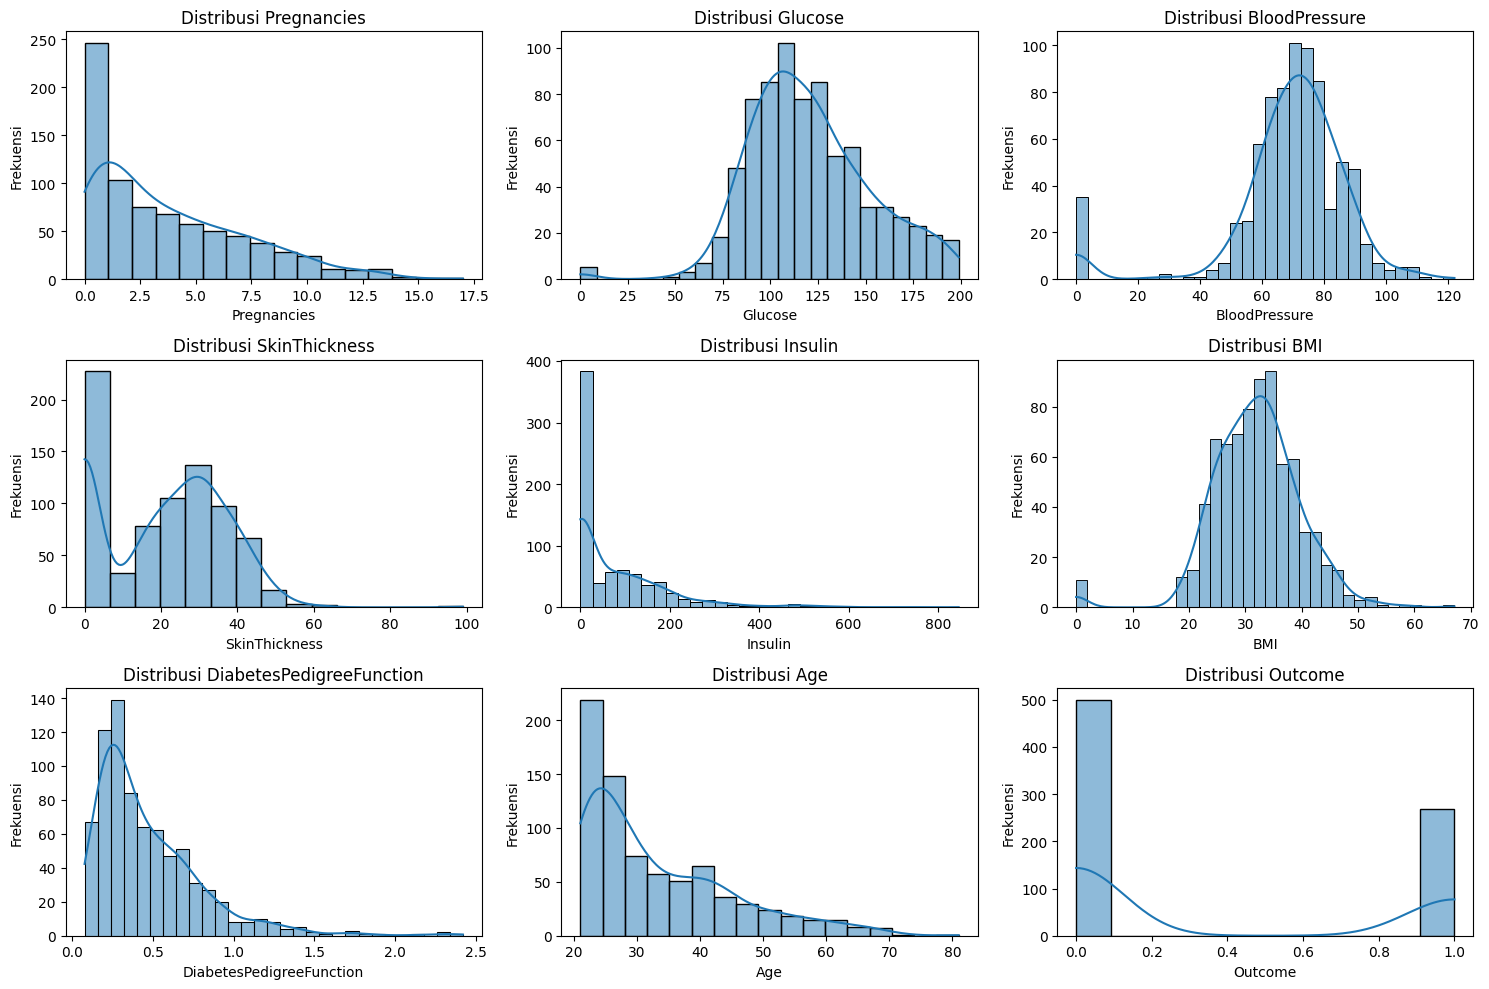

In [51]:
# Mengatur ukuran grafik
plt.figure(figsize=(15, 10))

# Menghitung jumlah kolom untuk histogram
n_cols = len(df_healthcare.columns)

# Membuat subplot untuk setiap kolom
for i, column in enumerate(df_healthcare.columns, 1):
    plt.subplot(3, 3, i)  # Menyesuaikan ukuran grid
    if df_healthcare[column].dtype == 'object':
        sns.countplot(x=column, data=df_healthcare)
    else:
        sns.histplot(df_healthcare[column], kde=True)
    plt.title(f'Distribusi {column}')
    plt.xlabel(column)
    plt.ylabel('Frekuensi')

plt.tight_layout()
plt.show()

###Melihat distribusi fitur berdasarkan Outcome:

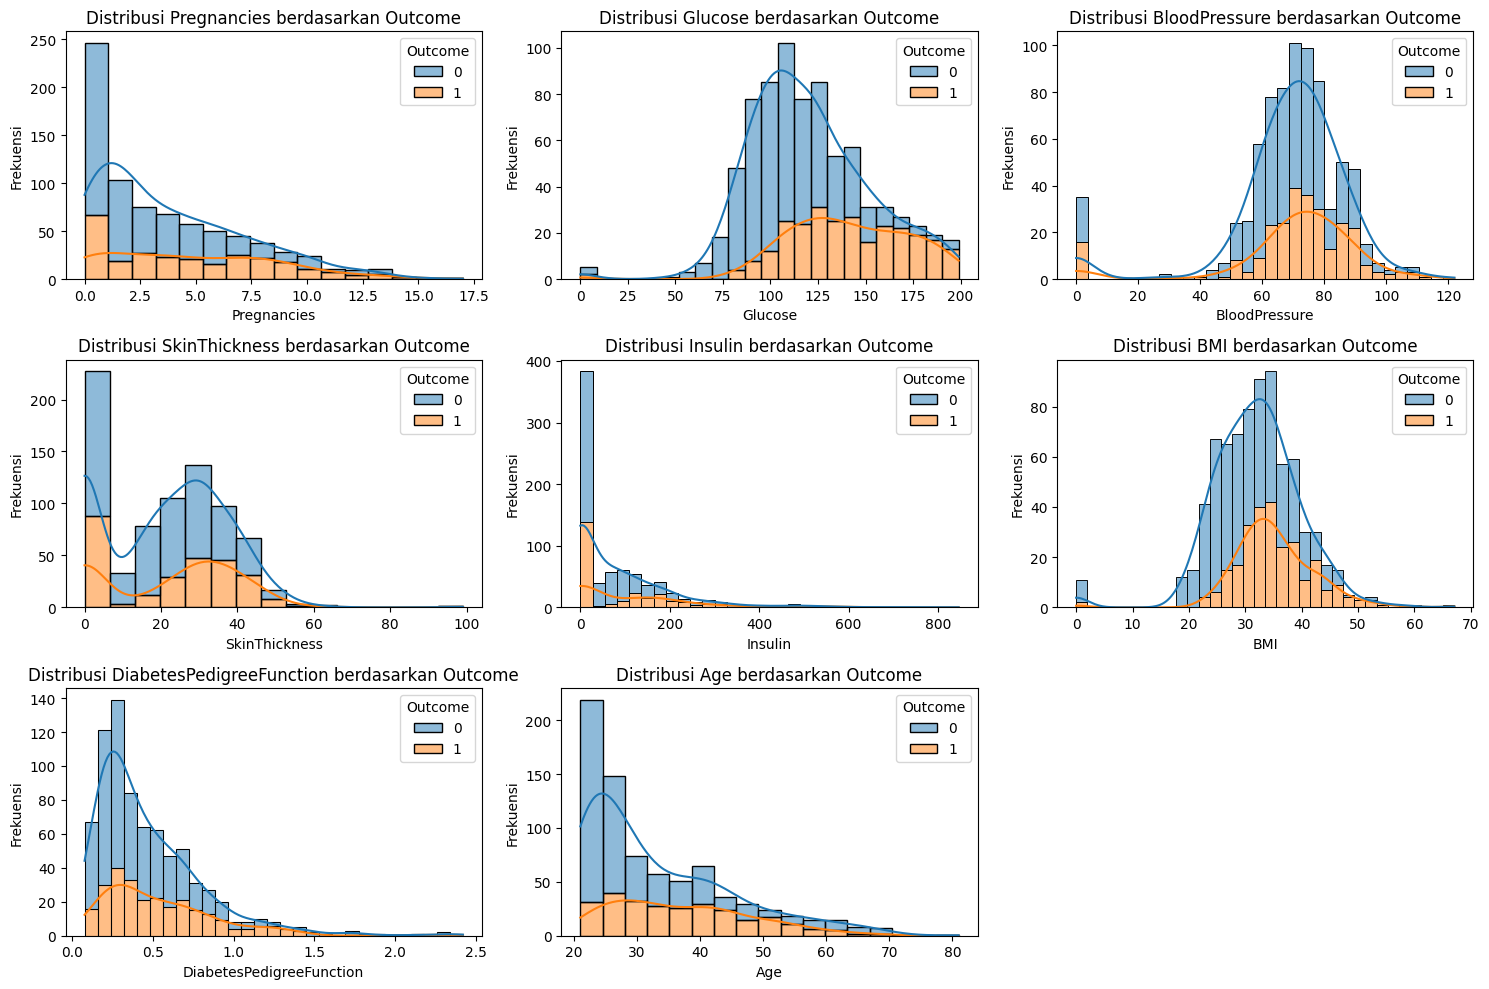

In [52]:
# Mengatur ukuran grafik
plt.figure(figsize=(15, 10))

# Membuat subplot untuk setiap kolom fitur (tidak termasuk 'Outcome')
features = [col for col in df_healthcare.columns if col != 'Outcome']
n_cols = len(features)

for i, column in enumerate(features, 1):
    plt.subplot(3, 3, i) # Menyesuaikan ukuran grid
    if df_healthcare[column].dtype == 'object':
        sns.countplot(x=column, hue='Outcome', data=df_healthcare)
    else:
        sns.histplot(data=df_healthcare, x=column, hue='Outcome', kde=True, multiple="stack")
    plt.title(f'Distribusi {column} berdasarkan Outcome')
    plt.xlabel(column)
    plt.ylabel('Frekuensi')

plt.tight_layout()
plt.show()

##Data Preprocessing

Tahap persiapan data sebelum modeling, meliputi penanganan nilai nol, outliers, dan scaling.

###Menghitung Q1, Q3 dan IQR. Selain itu Menentukan batas bawah atas dan menyimpan informasi outlier jika ada

In [53]:
# Menghitung Q1, Q3, dan IQR untuk setiap kolom numerik
for column in df_healthcare.select_dtypes(include='number').columns:
    Q1 = df_healthcare[column].quantile(0.25)
    Q3 = df_healthcare[column].quantile(0.75)
    IQR = Q3 - Q1

    # Menentukan batas bawah dan batas atas
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Menyimpan informasi tentang outliers
    outliers = df_healthcare[(df_healthcare[column] < lower_bound) | (df_healthcare[column] > upper_bound)]
    print(f'Outliers for {column}:\n', outliers)

Outliers for Pregnancies:
      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
88            15      136             70             32      110  37.1   
159           17      163             72             41      114  40.9   
298           14      100             78             25      184  36.6   
455           14      175             62             30        0  33.6   

     DiabetesPedigreeFunction  Age  Outcome  
88                      0.153   43        1  
159                     0.817   47        1  
298                     0.412   46        1  
455                     0.212   38        1  
Outliers for Glucose:
      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
75             1        0             48             20        0  24.7   
182            1        0             74             20       23  27.7   
342            1        0             68             35        0  32.0   
349            5        0             80             

###Menghapus outliers

In [54]:
# Menghapus outliers untuk setiap kolom numerik
for column in df_healthcare.select_dtypes(include='number').columns:
    Q1 = df_healthcare[column].quantile(0.25)
    Q3 = df_healthcare[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df_healthcare = df_healthcare[(df_healthcare[column] >= lower_bound) & (df_healthcare[column] <= upper_bound)]

###Visualisasi untuk mengecek apakah masih ada outliers

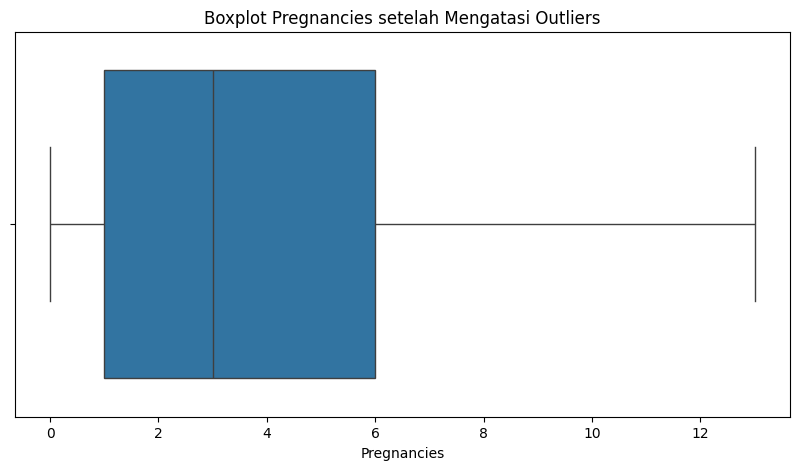

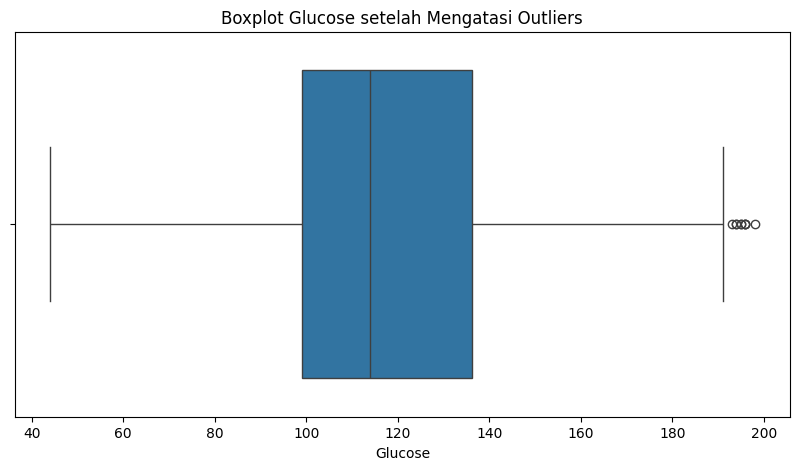

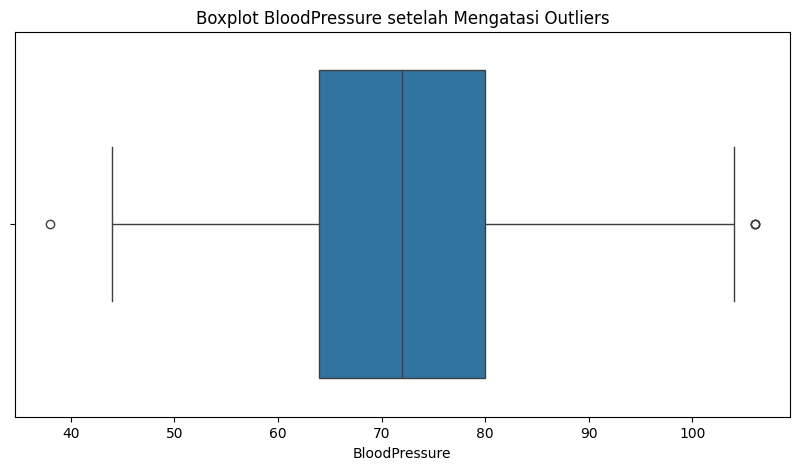

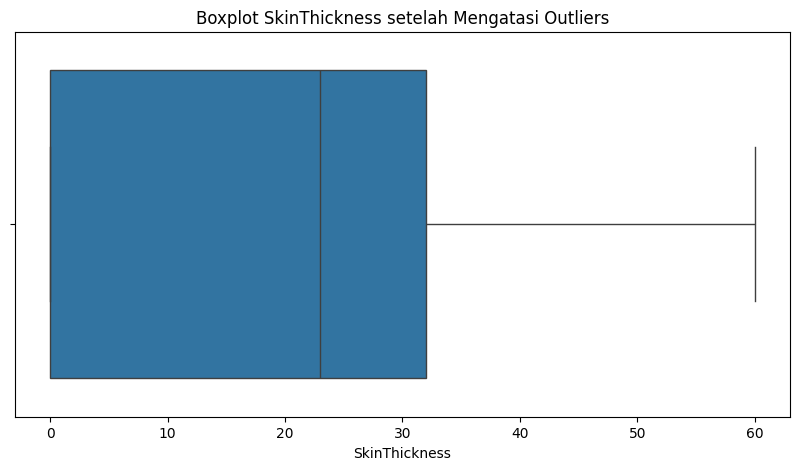

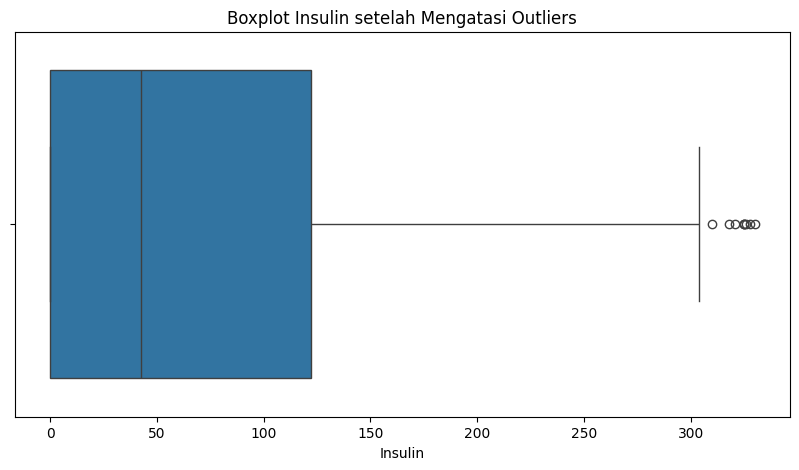

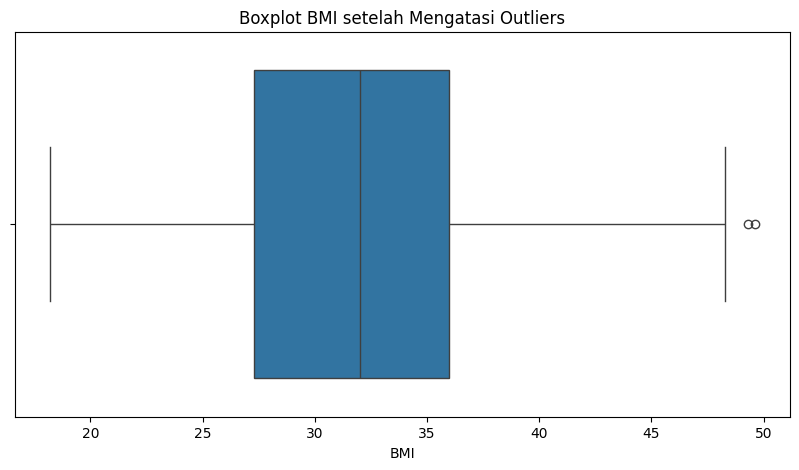

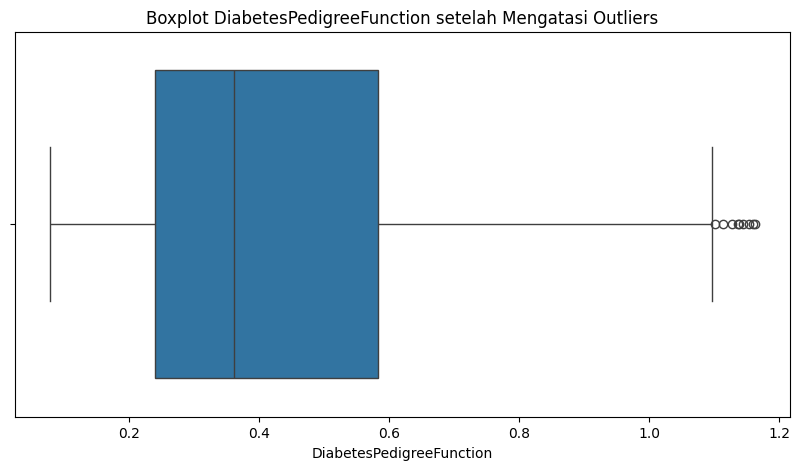

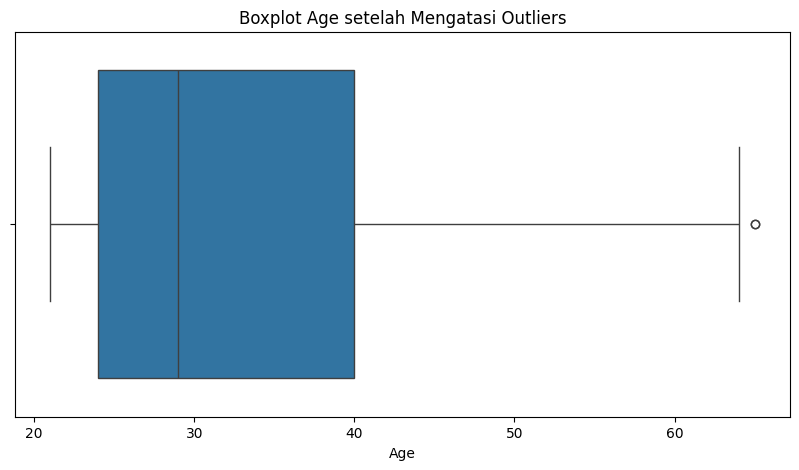

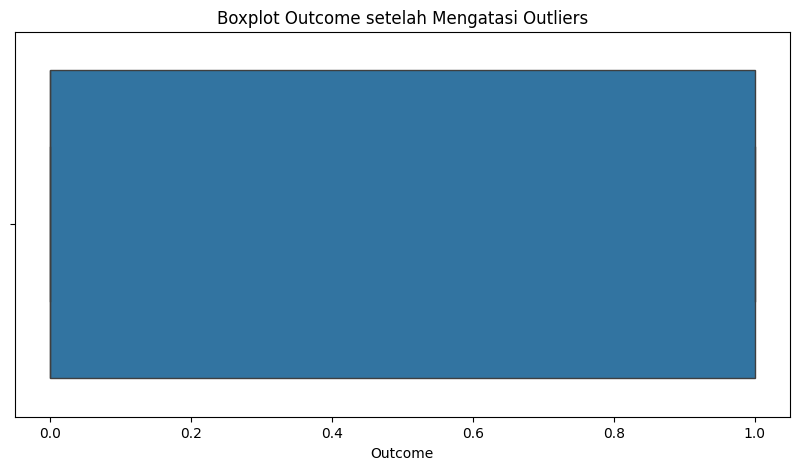

In [55]:
# Memeriksa kembali distribusi setelah penanganan outliers
for column in df_healthcare.select_dtypes(include='number').columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df_healthcare[column])
    plt.title(f'Boxplot {column} setelah Mengatasi Outliers')
    plt.xlabel(column)
    plt.show()

**Visualisasi Scatter Plot untuk Pasangan Fitur:**

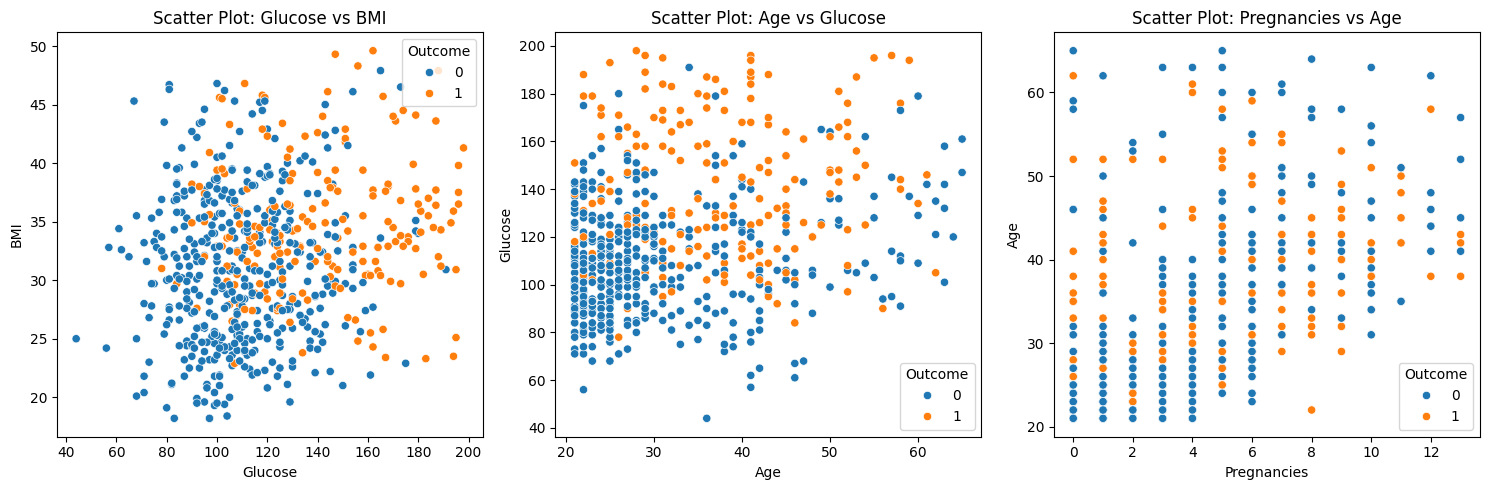

In [56]:
# Pilih beberapa pasangan fitur untuk scatter plot berdasarkan korelasi atau relevansi
# Contoh: Glucose vs BMI, Age vs Glucose, etc.
# Ganti nama kolom di bawah sesuai dengan fitur yang ingin Anda plot
features_to_plot = [('Glucose', 'BMI'), ('Age', 'Glucose'), ('Pregnancies', 'Age')]

plt.figure(figsize=(15, 5))

for i, (feature1, feature2) in enumerate(features_to_plot, 1):
    plt.subplot(1, len(features_to_plot), i)
    sns.scatterplot(data=df_healthcare, x=feature1, y=feature2, hue='Outcome')
    plt.title(f'Scatter Plot: {feature1} vs {feature2}')
    plt.xlabel(feature1)
    plt.ylabel(feature2)

plt.tight_layout()
plt.show()

##**Menghitung dan Memvisualisasikan Matriks Korelasi:**

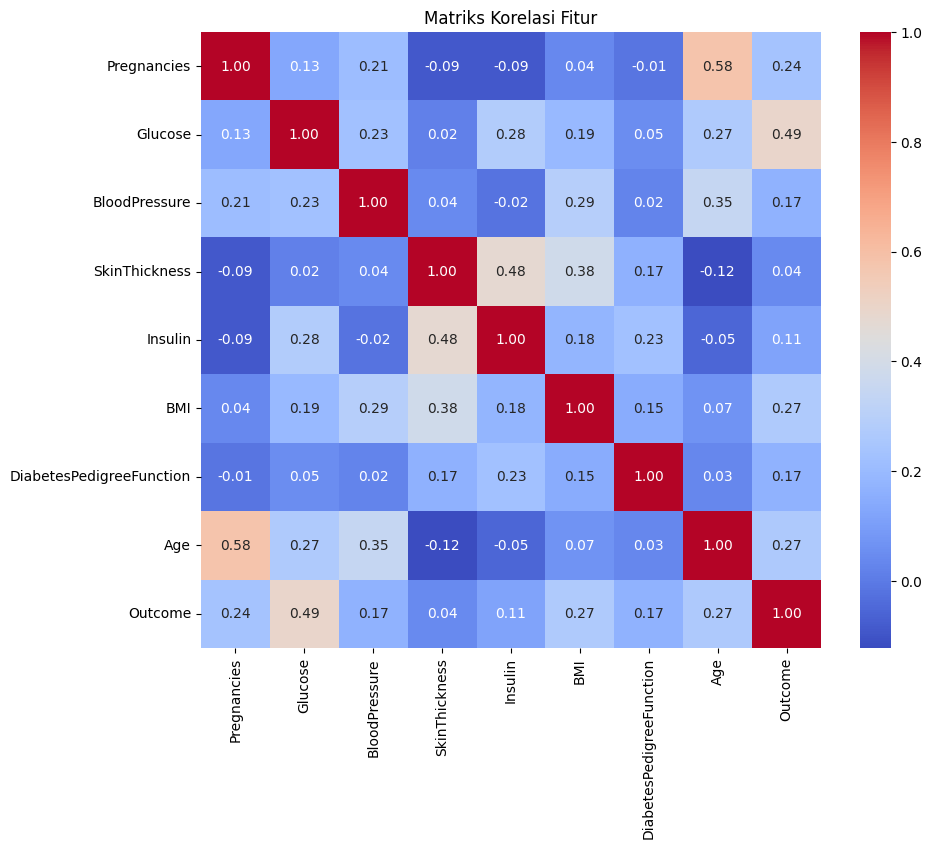

In [57]:
# Menghitung matriks korelasi
correlation_matrix = df_healthcare.corr()

# Membuat heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriks Korelasi Fitur')
plt.show()

##Scaling Fitur Numerik:

Melakukan penskalaan pada fitur-fitur numerik agar memiliki rentang nilai yang serupa

In [58]:
from sklearn.preprocessing import StandardScaler

# Pilih kolom numerik yang akan di-scale (kecuali 'Outcome')
numerical_features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Inisialisasi StandardScaler
scaler = StandardScaler()

# Lakukan scaling pada fitur numerik
df_healthcare[numerical_features] = scaler.fit_transform(df_healthcare[numerical_features])

# Tampilkan beberapa baris pertama setelah scaling
print("DataFrame setelah Scaling Fitur Numerik:")
display(df_healthcare.head())

DataFrame setelah Scaling Fitur Numerik:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.681426,1.005403,-0.000696,0.936596,-0.826197,0.256438,0.819791,1.604688,1
1,-0.857590,-1.168963,-0.532036,0.542370,-0.826197,-0.840893,-0.307223,-0.143041,0
2,1.297032,2.213384,-0.709149,-1.363054,-0.826197,-1.358207,1.003543,-0.051055,1
3,-0.857590,-1.030908,-0.532036,0.148145,0.299065,-0.605751,-1.058566,-1.062898,0
5,0.373623,-0.099037,0.176417,-1.363054,-0.826197,-0.997655,-0.919731,-0.235026,0


##Modelling

###Membagi Data menjadi Set Pelatihan dan Pengujian:

In [59]:
from sklearn.model_selection import train_test_split

# Memisahkan fitur (X) dan variabel target (y)
X = df_healthcare.drop('Outcome', axis=1)
y = df_healthcare['Outcome']

# Membagi data menjadi set pelatihan dan pengujian (misal 80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("\nUkuran X_train:", X_train.shape)
print("Ukuran X_test:", X_test.shape)
print("Ukuran y_train:", y_train.shape)
print("Ukuran y_test:", y_test.shape)


Ukuran X_train: (508, 8)
Ukuran X_test: (128, 8)
Ukuran y_train: (508,)
Ukuran y_test: (128,)


###Membangun dan Mengevaluasi Model Logistic Regression:

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Membuat instance model Logistic Regression
model_lr = LogisticRegression(max_iter=200) # Menambah max_iter jika konvergensi tidak tercapai

# Melatih model menggunakan data pelatihan
model_lr.fit(X_train, y_train)

# Memprediksi pada data pengujian
y_pred_lr = model_lr.predict(X_test)

# Mengevaluasi model
accuracy_lr = accuracy_score(y_test, y_pred_lr)
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
class_report_lr = classification_report(y_test, y_pred_lr)

print(f"Logistic Regression Accuracy: {accuracy_lr:.2f}")
print("\nLogistic Regression Confusion Matrix:\n", conf_matrix_lr)
print("\nLogistic Regression Classification Report:\n", class_report_lr)

Logistic Regression Accuracy: 0.80

Logistic Regression Confusion Matrix:
 [[80  8]
 [18 22]]

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.91      0.86        88
           1       0.73      0.55      0.63        40

    accuracy                           0.80       128
   macro avg       0.77      0.73      0.74       128
weighted avg       0.79      0.80      0.79       128



###Membangun dan Mengevaluasi Model Random Forest:

In [61]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Membuat instance model Random Forest Classifier
model_rf = RandomForestClassifier(n_estimators=100, random_state=42) # Anda bisa menyesuaikan parameter

# Melatih model menggunakan data pelatihan
model_rf.fit(X_train, y_train)

# Memprediksi pada data pengujian
y_pred_rf = model_rf.predict(X_test)

# Mengevaluasi model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)

print(f"Random Forest Accuracy: {accuracy_rf:.2f}")
print("\nRandom Forest Confusion Matrix:\n", conf_matrix_rf)
print("\nRandom Forest Classification Report:\n", class_report_rf)

Random Forest Accuracy: 0.77

Random Forest Confusion Matrix:
 [[78 10]
 [20 20]]

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.89      0.84        88
           1       0.67      0.50      0.57        40

    accuracy                           0.77       128
   macro avg       0.73      0.69      0.71       128
weighted avg       0.76      0.77      0.76       128



###Membandingkan Kinerja Model:

In [62]:
print("Perbandingan Kinerja Model:")
print("-" * 30)

print(f"Logistic Regression Accuracy: {accuracy_lr:.2f}")
print("Logistic Regression Classification Report:\n", class_report_lr)
print("-" * 30)

print(f"Random Forest Accuracy: {accuracy_rf:.2f}")
print("Random Forest Classification Report:\n", class_report_rf)
print("-" * 30)

# Menentukan model terbaik berdasarkan akurasi (Anda bisa memilih metrik lain)
if accuracy_lr > accuracy_rf:
    best_model_name = "Logistic Regression"
    best_model = model_lr
    best_accuracy = accuracy_lr
else:
    best_model_name = "Random Forest"
    best_model = model_rf
    best_accuracy = accuracy_rf

print(f"\nModel Terbaik berdasarkan Akurasi: {best_model_name} dengan Akurasi {best_accuracy:.2f}")

Perbandingan Kinerja Model:
------------------------------
Logistic Regression Accuracy: 0.80
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.91      0.86        88
           1       0.73      0.55      0.63        40

    accuracy                           0.80       128
   macro avg       0.77      0.73      0.74       128
weighted avg       0.79      0.80      0.79       128

------------------------------
Random Forest Accuracy: 0.77
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.89      0.84        88
           1       0.67      0.50      0.57        40

    accuracy                           0.77       128
   macro avg       0.73      0.69      0.71       128
weighted avg       0.76      0.77      0.76       128

------------------------------

Model Terbaik berdasarkan Akurasi: Logistic Regression dengan Akurasi 0.80


###Hyperparameter Tuning pada Logistic Regression dengan GridSearchCV:

In [63]:
from sklearn.model_selection import GridSearchCV

# Definisikan parameter grid yang akan dicari
param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100], # Inverse of regularization strength
    'penalty': ['l1', 'l2'], # Regularization type
    'solver': ['liblinear', 'saga'] # Algorithm to use in the optimization problem
}

# Buat instance GridSearchCV
# cv=5  menggunakan 5-fold cross-validation
# scoring='accuracy'  menggunakan akurasi sebagai metrik evaluasi
grid_search_lr = GridSearchCV(estimator=LogisticRegression(max_iter=200), param_grid=param_grid_lr, cv=5, scoring='accuracy')

# Lakukan grid search pada data pelatihan
grid_search_lr.fit(X_train, y_train)

# Tampilkan parameter terbaik dan skor terbaik
print("Parameter terbaik:", grid_search_lr.best_params_)
print("Skor akurasi terbaik (dari cross-validation):", grid_search_lr.best_score_)

# Evaluasi model terbaik pada data pengujian
best_model_lr = grid_search_lr.best_estimator_
y_pred_tuned_lr = best_model_lr.predict(X_test)

accuracy_tuned_lr = accuracy_score(y_test, y_pred_tuned_lr)
conf_matrix_tuned_lr = confusion_matrix(y_test, y_pred_tuned_lr)
class_report_tuned_lr = classification_report(y_test, y_pred_tuned_lr)

print(f"\nLogistic Regression Accuracy setelah Tuning: {accuracy_tuned_lr:.2f}")
print("\nLogistic Regression Confusion Matrix setelah Tuning:\n", conf_matrix_tuned_lr)
print("\nLogistic Regression Classification Report setelah Tuning:\n", class_report_tuned_lr)

Parameter terbaik: {'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}
Skor akurasi terbaik (dari cross-validation): 0.7914191419141913

Logistic Regression Accuracy setelah Tuning: 0.80

Logistic Regression Confusion Matrix setelah Tuning:
 [[81  7]
 [18 22]]

Logistic Regression Classification Report setelah Tuning:
               precision    recall  f1-score   support

           0       0.82      0.92      0.87        88
           1       0.76      0.55      0.64        40

    accuracy                           0.80       128
   macro avg       0.79      0.74      0.75       128
weighted avg       0.80      0.80      0.79       128



###Confusion Matrix for best model

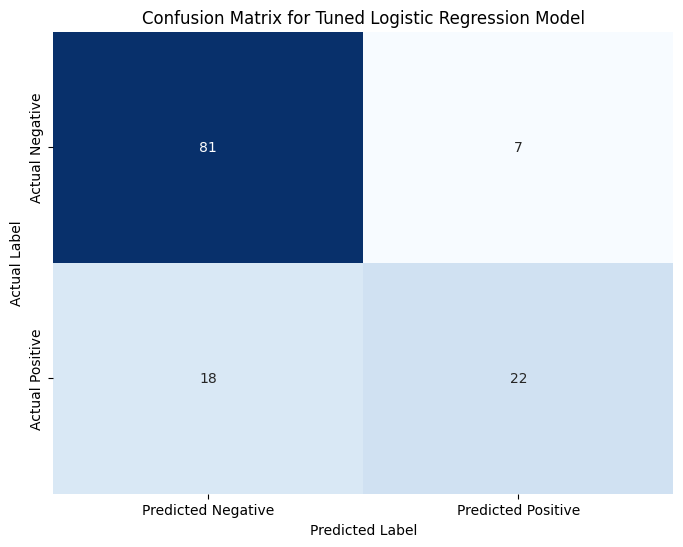

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

y_pred_tuned_lr = best_model_lr.predict(X_test) # Predicting on X_test, not y_test

# Calculate the confusion matrix for the best model
conf_matrix_tuned_lr = confusion_matrix(y_test, y_pred_tuned_lr)

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_tuned_lr, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for Tuned Logistic Regression Model')
plt.show()


Implementasikan cross-validation dan hitung metrik evaluasi tambahan untuk model Logistic Regression


In [70]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score

# Evaluate Logistic Regression with cross-validation
cv_scores_lr = cross_val_score(best_model_lr, X_train, y_train, cv=5, scoring='accuracy')
print(f"Logistic Regression Cross-Validation Accuracy: {cv_scores_lr.mean():.2f} (+/- {cv_scores_lr.std():.2f})")

# Train the best Logistic Regression model on the entire training set
best_model_lr.fit(X_train, y_train)

# Predict probabilities and labels on the test set
y_pred_prob_lr = best_model_lr.predict_proba(X_test)[:, 1]
y_pred_lr = best_model_lr.predict(X_test)

# Calculate additional metrics for Logistic Regression
auc_roc_lr = roc_auc_score(y_test, y_pred_prob_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)

print(f"Logistic Regression AUC-ROC: {auc_roc_lr:.2f}")
print(f"Logistic Regression Precision: {precision_lr:.2f}")
print(f"Logistic Regression Recall: {recall_lr:.2f}")
print(f"Logistic Regression F1-score: {f1_lr:.2f}")

Logistic Regression Cross-Validation Accuracy: 0.79 (+/- 0.03)
Logistic Regression AUC-ROC: 0.84
Logistic Regression Precision: 0.73
Logistic Regression Recall: 0.47
Logistic Regression F1-score: 0.58


Implementasikan cross-validation dan hitung metrik evaluasi tambahan untuk model Random Forest


In [71]:
# Evaluate Random Forest with cross-validation
cv_scores_rf = cross_val_score(model_rf, X_train, y_train, cv=5, scoring='accuracy')
print(f"\nRandom Forest Cross-Validation Accuracy: {cv_scores_rf.mean():.2f} (+/- {cv_scores_rf.std():.2f})")

# Train the Random Forest model on the entire training set
model_rf.fit(X_train, y_train)

# Predict probabilities and labels on the test set
y_pred_prob_rf = model_rf.predict_proba(X_test)[:, 1]
y_pred_rf = model_rf.predict(X_test)

# Calculate additional metrics for Random Forest
auc_roc_rf = roc_auc_score(y_test, y_pred_prob_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

print(f"Random Forest AUC-ROC: {auc_roc_rf:.2f}")
print(f"Random Forest Precision: {precision_rf:.2f}")
print(f"Random Forest Recall: {recall_rf:.2f}")
print(f"Random Forest F1-score: {f1_rf:.2f}")


Random Forest Cross-Validation Accuracy: 0.76 (+/- 0.02)
Random Forest AUC-ROC: 0.82
Random Forest Precision: 0.68
Random Forest Recall: 0.53
Random Forest F1-score: 0.59


##Kesimpulan

Model klasifikasi Logistic Regression yang telah di-tuning berhasil dibangun dengan kinerja yang baik dalam memprediksi diabetes berdasarkan data klinis pasien. Fitur glukosa menjadi prediktor paling signifikan. Model ini dapat menjadi alat bantu untuk deteksi dini diabetes, meskipun perlu validasi lebih lanjut dengan data yang lebih besar dan beragam, serta pertimbangan implementasi klinis.

hasil evaluasi untuk 3 skenario:

- Logistic Regression (Model Awal):

Confusion Matrix:
[[80  8]
 [18 22]]

- Random Forest:

Confusion Matrix:
[[78 10]
 [20 20]]

- Logistic Regression (Setelah Tuning):

Confusion Matrix:
[[81  7]
 [18 22]]
